In [1]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [3]:
type(inaugural.raw())
len(inaugural.raw())
len(inaugural.raw('1861-Lincoln.txt'))

21017

In [4]:
import nltk
from nltk import sent_tokenize,word_tokenize 

In [5]:
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

In [6]:
texts = [('trump',inaugural.raw('2017-Trump.txt')),
         ('obama',inaugural.raw('2009-Obama.txt')+inaugural.raw('2013-Obama.txt')),
         ('jackson',inaugural.raw('1829-Jackson.txt')+inaugural.raw('1833-Jackson.txt')),
         ('washington',inaugural.raw('1789-Washington.txt')+inaugural.raw('1793-Washington.txt'))]

for text in texts:
    (vocab,word_size,sent_size,vocab_to_text) = get_complexity(text[1])
    print("{0:15s}\t{1:1.2f}\t{2:1.2f}\t{3:1.2f}\t{4:1.2f}".format(text[0],vocab,word_size,sent_size,vocab_to_text))

trump          	540.00	5.00	18.00	0.32
obama          	1349.00	5.00	25.00	0.27
jackson        	813.00	5.00	45.00	0.33
washington     	636.00	5.00	62.00	0.38


In [7]:
# vocabulary. 5 characters per word
# Four to five is usually what you expect.
# number of words per sentence. 
# vocabulary to text ratios
# And this is partly because Obama also has probably the longest speeches,
# so he has the lowest vocabulary to length ratio.

<h2>Analysis over time</h2>


<h3>The files are arranged over time so we can analyze how complexity has changed between Washington and Trump</h3>

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
inaugural.words(inaugural.fileids()[0])
speech = ' '.join(inaugural.words(inaugural.fileids()[0]))
get_complexity(speech)

(604, 5, 66, 0.39246263807667314)

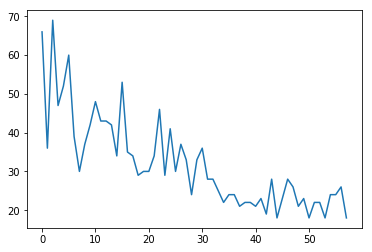

In [10]:
from nltk.corpus import inaugural
sentence_lengths = list()
for fileid in inaugural.fileids():
    sentence_lengths.append(get_complexity(' '.join(inaugural.words(fileid)))[2])
plt.plot(sentence_lengths)

How complexity - the number of words per sentence - has changed between Washington and Trump. 
Analysis the US Presidential Inaugural Addresses over time. From 1789 to 2017.

So it's a secular trend, 
where presidents in general--and probably president specific and probably people in general speak in shorter sentences.

<h1>dispersion plots</h1>
<h2>Dispersion plots show the relative frequency of words over the text</h2>
<h3>Let's see how the frequency of some words has changed over the course of the republic</h3>
<h3>That should give us some idea of how the focus of the nation has changed</h3>

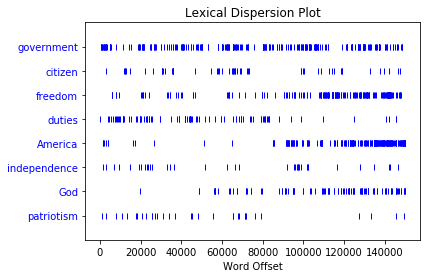

In [11]:
text4.dispersion_plot(["government", "citizen", "freedom", "duties", "America",'independence','God','patriotism'])

In [12]:
'APple'.lower()

'apple'

<h4>We may want to use word stems rather than the part of speech form</h4>
<li>For example: patriot, patriotic, patriotism all express roughly the same idea
<li>nltk has a stemmer that implements the "Porter Stemming Algorithm" (https://tartarus.org/martin/PorterStemmer/)
<li>We'll push everything to lowercase as well

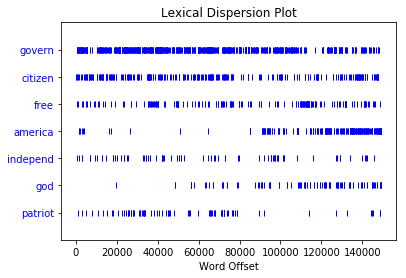

In [13]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
text = inaugural.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
words = word_tokenize(striptext)
text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
text.dispersion_plot(["govern", "citizen", "free", "america",'independ','god','patriot'])

How the relative frequency of those words change over time.
That should give us some idea of how the focus of the nation has changed.
Look at 'america'. Clearly, 'america' are bigger and bigger in recent yesrs.
- "Make America Great Again" -


In [14]:
great = 'make america great again'
great.title()

'Make America Great Again'

<h2>Weighted word analysis using Vader</h2>
<h4>Vader contains a list of 7500 features weighted by how positive or negative they are</h4>
<h4>It uses these features to calculate stats on how positive, negative and neutral a passage is</h4>
<h4>And combines these results to give a compound sentiment (higher = more positive) for the passage</h4>
<h4>Human trained on twitter data and generally considered good for informal communication</h4>
<h4>10 humans rated each feature in each tweet in context from -4 to +4</h4>
<h4>Calculates the sentiment in a sentence using word order analysis</h4>
<li>"marginally good" will get a lower positive score than "extremely good"
<h4>Computes a "compound" score based on heuristics (between -1 and +1)</h4>
<h4>Includes sentiment of emoticons, punctuation, and other 'social media' lexicon elements</h4>



In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [23]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
heights_root = "data/heights"
heights_files = "heights.*"
amigos_root = "data/amigos"
amigos_files = "amigos.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
heights_data = PlaintextCorpusReader(heights_root,heights_files)
amigos_data = PlaintextCorpusReader(amigos_root,amigos_files)

In [24]:
restaurant_data = [('community',community_data.raw()),('le monde',le_monde_data.raw())
                  ,('heights',heights_data.raw()), ('amigos',amigos_data.raw())]

In [25]:
restaurant_data[0][1]

'I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitchen where tons of f

In [26]:
texts = [('trump',inaugural.raw('2017-Trump.txt')),
         ('obama',inaugural.raw('2009-Obama.txt')+inaugural.raw('2013-Obama.txt')),
         ('jackson',inaugural.raw('1829-Jackson.txt')+inaugural.raw('1833-Jackson.txt')),
         ('washington',inaugural.raw('1789-Washington.txt')+inaugural.raw('1793-Washington.txt'))]

In [27]:
trump_data = PlaintextCorpusReader("data", "2017-Trump.txt")

In [28]:
headers = ['pos','neg','neu','compound']
texts = restaurant_data
analyzer = SentimentIntensityAnalyzer()
for i in range(len(texts)):
    name = texts[i][0]
    sentences = sent_tokenize(texts[i][1])
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    print(name,pos,neg,neu,compound)

community 0.20231531531531521 0.026099099099099105 0.7715900900900892 0.33487432432432435
le monde 0.17217021276595745 0.04306914893617022 0.7847712765957447 0.2149292553191488
heights 0.18540645161290326 0.03818064516129032 0.7764000000000002 0.2778316129032258
amigos 0.19277464788732385 0.051741784037558705 0.7554976525821597 0.2521694835680751


In [29]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [30]:
vader_comparison(restaurant_data)

Name	   pos	 neg	 neu	 compound
community  0.20	 0.03	 0.77	 0.33	
le monde   0.17	 0.04	 0.78	 0.21	
heights    0.19	 0.04	 0.78	 0.28	
amigos     0.19	 0.05	 0.76	 0.25	


In [31]:
vader_comparison(texts)

Name	   pos	 neg	 neu	 compound
community  0.20	 0.03	 0.77	 0.33	
le monde   0.17	 0.04	 0.78	 0.21	
heights    0.19	 0.04	 0.78	 0.28	
amigos     0.19	 0.05	 0.76	 0.25	


In [32]:
type(texts[0][1])

str

In [33]:
nltk.Text(trump_data.words()).concordance('america',100)

Displaying 20 of 20 matches:
of the world , thank you . We the citizens of America are now joined in a great national effort to 
le . Together we will determine the course of America , and the world , for many , many years to co
re today , and everyone watching , all across America . This is your day . This is your celebration
celebration , and this , the United States of America , is your country . What truly matters is not
ons and trillions of dollars overseas , while America ' s infrastructure has fallen into disrepair 
om this day forward , it ' s going to be only America first . America first . Every decision on tra
ard , it ' s going to be only America first . America first . Every decision on trade , on taxes , 
body , and I will never , ever let you down . America will start winning again , winning like never
be a total allegiance to the United States of America , and through our loyalty to our country , we
eements , but always pursue solidarity . When America is united , Ameri

- The lower compound score, 国际国内局势充满挑战 - 金融危机，恐怖袭击
- The higher positive rating, 更加鼓励人们充满希望
- The higher negative rating, 现在或者近一段时间，发生了更多不美好的事情

- Community has a 0.20 positive and a 0.03 negative,
- which actually is the highest positive and the lowest negative rating of all of them.
- the highest compound score 0.33.
- So looking at this stuff, we find that Community is the most positive restaurant.
- And that's kind of borne out with the fact that, to be honest, 
- if you live in this neighborhood,
- you'll see that to get a table in Community at night is really, really hard.


<h2>Named Entities</h2>
<h4>People, places, organizations</h4>
Named entities are often the subject of sentiments so identifying them can be very useful

<h4>Named entity detection is based on Part-of-speech tagging of words and chunks (groups of words)</h4>
<li>Start with sentences (using a sentence tokenizer)
<li>tokenize words in each sentence
<li>chunk them. ne_chunk identifies likely chunked candidates (ne = named entity)
<li>Finally build chunks using nltk's guess on what members of chunk represent (people, place, organization)



In [34]:
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = sent_detector.tokenize(community_data.raw().strip())

In [35]:
sentence_t = sentences[2]
tokenized = nltk.word_tokenize(sentence_t)
tagged = nltk.pos_tag(tokenized)
chunked = nltk.ne_chunk(tagged)

In [36]:
type(chunked)
#print(chunked[0])
#chunked[0].leaves()

for tree in chunked:
    if hasattr(tree, 'label'):
        for c in tree.leaves():
            print(c[0])
        ne = ' '.join(c[0] for c in tree.leaves())

NYC
Columbia


In [37]:
ne

'Columbia'

In [38]:
#sum([hasattr(tree, 'label') for tree in chunked if hasattr(tree, 'label')])
[tree for tree in chunked if hasattr(tree, 'label')]

[Tree('ORGANIZATION', [('NYC', 'NNP')]), Tree('GPE', [('Columbia', 'NNP')])]

In [39]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(community_data.raw().strip())
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

{   'America': ['GPE', 'NNP'],
    'Awesome': ['GPE', 'NNP'],
    'BEST': ['ORGANIZATION', 'NNP'],
    'Bill': ['PERSON', 'NN'],
    'Boston': ['GPE', 'NNP'],
    'Bottomless': ['GPE', 'NNP'],
    'Broadway': ['GPE', 'NNP'],
    'Brooklyn': ['GPE', 'NNP'],
    'Brunch': ['PERSON', 'NNP'],
    'CU': ['ORGANIZATION', 'NNP'],
    'Came': ['GPE', 'NN'],
    'Cana': ['PERSON', 'NNP'],
    'Cheaper': ['GPE', 'NNP'],
    'Colombia': ['GPE', 'NNP'],
    'Columbia': ['GPE', 'NNP'],
    'Columbia University': ['ORGANIZATION', 'NNP NNP'],
    'Columbian': ['GPE', 'JJ'],
    'Community': ['ORGANIZATION', 'NNP'],
    'Community Food': ['ORGANIZATION', 'NNP NNP'],
    'Company': ['ORGANIZATION', 'NNP'],
    'Country Breakfast': ['ORGANIZATION', 'NNP NNP'],
    'Delish': ['GPE', 'NNP'],
    'Dinner': ['GPE', 'NN'],
    'Disclaimer': ['GPE', 'NN'],
    'Everyone': ['GPE', 'NN'],
    'FRESH': ['ORGANIZATION', 'NNP'],
    'Fire Island Beer': ['ORGANIZATION', 'NNP NNP NNP'],
    'Flor': ['GPE', 'NNP'],
 

<h4>Assuming we've done a good job of identifying named entities, we can get an affect score on entities</h4>

In [40]:
meaningful_sents = list()
i=0
for sentence in sentences:
    if 'service' in sentence:
        i+=1
        meaningful_sents.append((i,sentence))

vader_comparison(meaningful_sents) 

Name	   pos	 neg	 neu	 compound
1          0.00	 0.00	 1.00	 0.00	
2          0.11	 0.15	 0.73	 -0.17	
3          0.53	 0.00	 0.47	 0.84	
4          0.28	 0.00	 0.71	 0.49	
5          0.23	 0.00	 0.78	 0.49	
6          0.36	 0.00	 0.64	 0.74	


In [41]:
meaningful_sents

[(1, 'The food, service & ambiance was exactly what we were looking for.'),
 (2,
  'I wish I took a picture, but I dug right in due to brunch hunger and slow service.'),
 (3, 'All in all, a pleasant experience with nice service and nice company.'),
 (4, 'Even though it was packed service was very good.'),
 (5,
  'I came here with a friend - we were seated promptly and service was attentive.'),
 (6,
  'Thanks to the kind service as well,i will remember this restaurant as a Columbian.')]

<h4>We could also develop a affect calculator for common terms in our domain (e.g., food items)</h4>

In [42]:
def get_affect(text,word,lower=False):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    #print(sentences)
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: sentence = sentence.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

In [43]:
get_affect(community_data.raw(),'service',True)
get_affect(amigos_data.raw(),'service',True)
get_affect(heights_data.raw(),'brunch',True)

0.4215

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sentences_t1 = sent_detector.tokenize(community_data.raw().strip())
sentence_count = 0
running_total = 0
vs = analyzer.polarity_scores(sentences_t1[0]) 
vs
# for sentence_t1 in sentences_t1:
#     if lower: sentence_t1 = sentence_t1.lower()
#     if word in sentence_t1:
#         vs = analyzer.polarity_scores(sentence_t1) 
#         running_total += vs['compound']
#         sentence_count += 1

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

<h4>The nltk function concordance returns text fragments around a word</h4>


In [45]:
nltk.Text(community_data.words()).concordance('brunch',100)

Displaying 20 of 20 matches:
ommend you seek them out . This is such a good brunch spot ! The food , service & ambiance was exact
the fruit was all very fresh . Overall , great brunch & highly recommend for a lovely brunch ! Such 
, great brunch & highly recommend for a lovely brunch ! Such a cute neighborhood spot and perfect fo
neighborhood spot and perfect for a pre - park brunch . This place is great for Brunch . I went with
 a pre - park brunch . This place is great for Brunch . I went with my mom and my brother . Even tho
h I took a picture , but I dug right in due to brunch hunger and slow service . I ' d come back agai
' ve come here several times with a friend for brunch and once for dinner -- we ' ve both really enj
here ' s always summer break ... Came here for brunch with my wife after she found the good review ,
!!! All the food was amazing . My new favorite brunch spot . Will be exploring more items on the men
orable and delicious ! Initially , we went for brunch in the e

<h2>Text summarization</h2>
<h4>Text summarization is useful because you can generate a short summary of a large piece of text automatically</h4>
<h4>Then, these summaries can serve as an input into a topic analyzer to figure out what the main topic of the text is</h4>

A naive form of summarization is to 
- identify the most frequent words in a piece of text and 
- use the occurrence of these words in sentences to 
- rate the importance of a sentence. 

In [46]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

<h4>Then prep the text. Get rid of end of line chars</h4>

In [47]:
text = community_data.raw()
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [48]:
print(striptext.find('\n'))
text.find('\n')

-1


551

In [49]:
'confidence'.isalpha()

True

<h4>Construct a list of words after getting rid of unimportant ones and numbers</h4>


In [50]:
words = word_tokenize(striptext)
lowercase_words = [word.lower() for word in words
                  if word not in stopwords.words() and word.isalpha()]

<h4>Construct word frequencies and choose the most common n (20)</h4>

In [51]:
word_frequencies = FreqDist(lowercase_words)
most_frequent_words = FreqDist(lowercase_words).most_common(20)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(most_frequent_words)

[   ('i', 73),
    ('the', 46),
    ('food', 20),
    ('brunch', 20),
    ('good', 19),
    ('place', 15),
    ('nice', 13),
    ('ordered', 13),
    ('pancakes', 13),
    ('fresh', 13),
    ('came', 13),
    ('my', 12),
    ('coffee', 12),
    ('delicious', 12),
    ('we', 10),
    ('community', 10),
    ('eggs', 10),
    ('friend', 10),
    ('one', 10),
    ('get', 9)]


<h4>lowercase the sentences</h4>
candidate_sentences is a dictionary with the original sentence as the key, and its lowercase version as the value

In [52]:
sentences = sent_tokenize(striptext)
for sentence in sentences:
    candidate_sentences[sentence] = sentence.lower()
candidate_sentences

{'"I have a degree from Columbia, and now I have to get one from America."': '"i have a degree from columbia, and now i have to get one from america."',
 '- Jeff Winger, Community.': '- jeff winger, community.',
 '- The truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.': '- the truffle egg dish: had sausage, potatoes, some leafy greens, sautéed mushrooms, and poached egg on top.',
 '- Troy Barnes Man I love that show.': '- troy barnes man i love that show.',
 '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.': '-7 grains waffle: had vanilla cream, raspberry, cherry, and toasted nuts.',
 '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!': '15 minuets wait for the wait staff, 45 minuets before we got the wrong dish!',
 '2 HOURS AND NO FOOD!': '2 hours and no food!',
 "A man came over to the table and filled our waters but didn't introduce himself as our waiter so I wasn't sure if he 

In [53]:
for long, short in candidate_sentences.items():
    print((long, short))
    print()

('I ate here Monday night for a working dinner with a coworker.', 'i ate here monday night for a working dinner with a coworker.')

("I immediately saw its reason for name, beyond the owner's fandom of the show of the same name: the tablet setup are nearly all communal long tables.", "i immediately saw its reason for name, beyond the owner's fandom of the show of the same name: the tablet setup are nearly all communal long tables.")

("There're rather few non-shared tables which is fine as not only is NYC filled with such setup but there's a liveliness in the Columbia area vibe which prefers this setup.", "there're rather few non-shared tables which is fine as not only is nyc filled with such setup but there's a liveliness in the columbia area vibe which prefers this setup.")

("There's a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.", "there's a shortage of such nice sit-d

In [54]:
for long, short in candidate_sentences.items():
    count = 0
    for freq_word, frequency_score in most_frequent_words[3:]:
        if freq_word in short:
            count += frequency_score
    candidate_sentence_counts[long] = count

In [55]:
#candidate_sentence_counts

In [57]:
sorted_sentences = OrderedDict(sorted(
                    candidate_sentence_counts.items(),
                    key = lambda x: x[1],
                    reverse = True)[:4])
pp.pprint(sorted_sentences)

OrderedDict([   (   'There are a lot of nice places in the city where you can '
                    'get a very good breakfast for 1/3rd to 1/2 less than '
                    'Community.',
                    66),
                (   'I ordered a mimosa, which was pretty good, and my friend '
                    'ordered a coffee which was served in a huge mug.',
                    66),
                (   'Came here for brunch with my wife after she found the '
                    'good review, and it did not disappoint!',
                    64),
                (   'We each ordered blueberry pancakes and a cup of '
                    'coffee--no fresh fruit, no juice, no bacon.',
                    61)])


<h4>Packaging all this into a function</h4>

In [58]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20)
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for long, short in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in short:
                count += frequency_score
        candidate_sentence_counts[long] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:4])
    return sorted_sentences   

In [59]:
# summary = '\n'.join(build_naive_summary(community_data.raw()))
# print(summary)

In [60]:
summary = '\n\n'.join(build_naive_summary(le_monde_data.raw()))
print(summary)

i would recommend going for brunch over any other meal, as everything i've ordered for brunch has been quite good the shakshuka is great, and you can't anything else like it in the area.

I would love to try them out for dinner, as I said, the service was great and we were checked on regularly.

I would give them a better review because the food was good but the waiting really was long.

The food was really good and they are known for their brunch menu.


<h4>We can summarize George Washington's first inaugural speech<h4>

In [61]:
# build_naive_summary(inaugural.raw('1789-Washington.txt'))

In [62]:
Obama2013 = '\n\n'.join(build_naive_summary(inaugural.raw('2013-Obama.txt')))
print(Obama2013)

We, the people, declare today that the most evident of truths â- that all of us are created equal â- is the star that guides us still; just as it guided our forebears through Seneca Falls, and Selma, and Stonewall; just as it guided all those men and women, sung and unsung, who left footprints along this great Mall, to hear a preacher say that we cannot walk alone; to hear a King proclaim that our individual freedom is inextricably bound to the freedom of every soul on Earth.

But we have always understood that when times change, so must we; that fidelity to our founding principles requires new responses to new challenges; that preserving our individual freedoms ultimately requires collective action.

So we must harness new ideas and technology to remake our government, revamp our tax code, reform our schools, and empower our citizens with the skills they need to work harder, learn more, reach higher.

Our journey is not complete until our gay brothers and sisters are treated like 

In [63]:
Trump2017 = '\n\n'.join(build_naive_summary(inaugural.raw('2017-Trump.txt')))
print(Trump2017)

We the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people.

We will get our people off of welfare and back to work, rebuilding our country with American hands and American labor.

One by one, the factories shuddered and left our shores, with not even a thought about the millions and millions of American workers that were left behind.

We all enjoy the same glorious freedoms, and we all salute the same, great American flag.


<h1>Topic modeling</h1>
<h4>The goal of topic modeling is to identify the major concepts underlying a piece of text</h4>
<h4>Topic modeling uses "Unsupervised Learning". No apriori knowledge is necessary
<li>Though it is helpful in cleaning up results!

<h3>LDA: Latent Dirichlet Allocation Model</h3>
<li>Identifies potential topics using pruning techniques like 'upward closure'
<li>Computes conditional probabilities for topic word sets
<li>Identifies the most likely topics
<li>Does this over multiple passes probabilistically picking topics in each pass
<li>Good intuitive explanation: http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

In [64]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

In [65]:
text = PlaintextCorpusReader("data/","Nikon_coolpix_4300.txt").raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
#words = word_tokenize(striptext)
#tokenize each sentence into word tokens
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for sentence in sentences]
len(texts)

360

In [66]:
# texts = []
# for sentence in sentences:
#     for word in sentence.lower().split():
#         if word not in STOPWORDS and word.isalnum():
#             texts.append(word)
print('1'.isalnum())
print('nba'.isalnum())
'1'.isalpha()

True
True


False

<h4>Create a (word,frequency) dictionary for each word in the text</h4>
- create a dictionary and a corpus.
- the dictionary is every word in the text is given a number.
- the goal here roughly is to construct sentences that are 
  - these numbers instead of the actual words itself, 
  - all LDA is doing is it's creating a network of these sentences.
  - And we'll see how closely related they are.
  
- So if it says sentence one is word 7, 14, 23, 24, 25,
  - and sentence two is 7, 14, 6, 9, 25, then it knows that
  - there's a linkage of three of the words are connected in those two sentences.
  - So rather than looking at words, it looks at numbers. It's much faster
  
- it's replacing the word by number.
  - And this is keeping track of what the linkage between the word and the number is.
  
- Corpus
  - It's telling us that sentence number nine has word number 17 occurs once,
  - word number 66 occurs twice ... 
  - the number of the word in a sentence and 
  - the frequency of its occurrence in that sentence.


In [68]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
# print(dictionary.token2id)
# print(dictionary.keys())
print(corpus[9])
print(texts[9])
print(dictionary[73])
#dictionary[4]

[(20, 1), (32, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1)]
['rechargable', '16', 'mb', 'compact', 'flash', 'rechargable', 'battery', 'charging', 'unit', 'included', 'fast', 'small']
rechargable


In [75]:
print(texts[0])
dictionary.doc2bow(texts[0])

['annotated', 'minqing', 'hu', 'bing']


[(0, 1), (1, 1), (2, 1), (3, 1)]

- So the sentence is rechargeable twice.
- So that's why we got 73 comma 2 in our corpus.
- And that's the whole linkage here.

In [76]:
#Set parameters
num_topics = 5 #The number of topics that should be generated
passes = 10 # how many passes we want to do.

In [77]:
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=10)

In [78]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=3)) # print only three words per topic

[   (0, '0.035*"camera" + 0.027*"battery" + 0.022*"pictures"'),
    (1, '0.033*"camera" + 0.022*"use" + 0.013*"easy"'),
    (2, '0.033*"camera" + 0.020*"card" + 0.011*"picture"'),
    (3, '0.058*"camera" + 0.015*"nikon" + 0.014*"easy"'),
    (4, '0.018*"camera" + 0.014*"card" + 0.014*"pictures"')]


In [79]:
print(len(corpus))
print(corpus[0])
#corpus[1]

360
[(0, 1), (1, 1), (2, 1), (3, 1)]


<h2>Matching topics to documents</h2>
<h3>Sort topics by probability</h3>

- let's say you have 1,000 different documents, and you have a new document coming in.
- take your initial set of 1,000 documents, print it up into a training and test sample,
- take the training sample, look at that for possible topics,
- as a new document comes in, what are the main topics

- it's really a question of 
  - taking a large number of topics and 
  - deciding what are the range of topics that they cover.
  - When you get a new document,
  - you can figure out which particular topic or topics that new document addresses.


<h4>We're using sentences as documents here, so this is less than ideal</h4>

In [110]:
# corpus 0 is the first sentence in our document
# it says that the first sentenceis focused on topic number 4, which was camera picture use.

# giving a minimum probability 0, which says that 
# you don't include anything that has probability of less than 0.

from operator import itemgetter
lda.get_document_topics(corpus[0],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(0, 0.83995926),
 (4, 0.04001236),
 (2, 0.040010743),
 (1, 0.04000895),
 (3, 0.040008694)]

<h3>Making sense of the topics</h3>

In [103]:
# prob_tol = sum([prob for word,prob in lda.show_topic(2,topn=50)])
# print(prob_tol)

# word_list = []
# for word,prob in lda.show_topic(2,topn=50):
#     #print(word, prob)
#     prob_total += prob
#     freq = int(prob/prob_total*1000)
#     alist=[word]
#     word_list.extend(alist*freq)

#  take all these words, rate them by their probabilities,

In [104]:
['camera']*5

['camera', 'camera', 'camera', 'camera', 'camera']

In [105]:
breakfast = ['egg']
breakfast.append(['coffee', 'milk'])
print(breakfast)
breakfast.extend(['bread', 'orange'])
breakfast

['egg', ['coffee', 'milk']]


['egg', ['coffee', 'milk'], 'bread', 'orange']

In [106]:
# for any given topic-- we can actually draw a word cloud

def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
#    prob_tol = sum([prob for word,prob in lda.show_topic(topicnum,topn=50)])
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    text = ' '.join(word_list)
    #wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(' '.join(word_list))
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

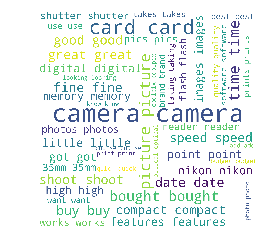

In [107]:
draw_wordcloud(lda,2) # topicnum

<h4>Roughly,</h4>
<li>lda looks for candidate topics assuming that there are many such candidates
<li>looks for words related to the candidate topics
<li>assign probablilites to those words

<h3>Let's look at Presidential addresses to see what sorts of topics emerge from there</h3>
<li>Each document will be analyzed for topic</li>
<li>The corpus will consist of 58 documents, one per presidential address

In [116]:
trump = inaugural.fileids()[-1]
inaugural.words(trump)

['Chief', 'Justice', 'Roberts', ',', 'President', ...]

In [112]:
REMOVE_WORDS = {'shall','generally','spirit','country','people','nation','nations','great','better'}
#Create a word dictionary (id, word)
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word not in REMOVE_WORDS and word.isalnum()]
        for sentence in sentences]
dictionary = corpora.Dictionary(texts)

texts_0502 = [[word for word in inaugural.words(fileid) 
               if word not in STOPWORDS and word not in REMOVE_WORDS and word.isalpha() and len(word) >4]
              for fileid in inaugural.fileids()]
dictionary_0502 = corpora.Dictionary(texts_0502)

#Create a corpus of documents
text_list = list()
for fileid in inaugural.fileids():
    text = inaugural.words(fileid)
    doc=list()
    for word in text:
        if word in STOPWORDS or word in REMOVE_WORDS or not word.isalpha() or len(word) <5:
            continue
        doc.append(word)
    text_list.append(doc)
by_address_corpus = [dictionary.doc2bow(text) for text in text_list] # each one of them is a document 

In [121]:
texts_0502 = [[word for word in inaugural.words(fileid) 
               if word not in STOPWORDS and word not in REMOVE_WORDS and word.isalpha() and len(word) >4]
              for fileid in inaugural.fileids()]
dictionary_0502 = corpora.Dictionary(texts_0502)

#Create a corpus of documents
text_list = list()
for fileid in inaugural.fileids():
    text = inaugural.words(fileid)
    doc=list()
    for word in text:
        if word in STOPWORDS or word in REMOVE_WORDS or not word.isalpha() or len(word) <5:
            continue
        doc.append(word)
    text_list.append(doc)
by_address_corpus_0502 = [dictionary_0502.doc2bow(text) for text in text_list] # each one of them is a document 

<h2>Create the model</h2>

In [113]:
lda = LdaModel(by_address_corpus,
              id2word=dictionary,
              num_topics=20,
              passes=10)

In [122]:
lda_0502 = LdaModel(by_address_corpus_0502,
              id2word=dictionary_0502,
              num_topics=20,
              passes=10)

In [123]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=10))

[   (   0,
        '0.038*"world" + 0.030*"action" + 0.028*"right" + 0.025*"power" + '
        '0.022*"means" + 0.022*"support" + 0.021*"thought" + 0.018*"course" + '
        '0.018*"little" + 0.015*"conditions"'),
    (   1,
        '0.035*"power" + 0.033*"experience" + 0.025*"trust" + 0.017*"subject" '
        '+ 0.015*"office" + 0.015*"action" + 0.015*"control" + 0.014*"rapid" + '
        '0.013*"looking" + 0.013*"years"'),
    (   2,
        '0.056*"helped" + 0.037*"money" + 0.036*"action" + 0.033*"emergency" + '
        '0.020*"important" + 0.016*"performance" + 0.016*"problem" + '
        '0.015*"adequate" + 0.015*"direct" + 0.015*"larger"'),
    (   3,
        '0.151*"world" + 0.031*"power" + 0.019*"years" + 0.018*"future" + '
        '0.018*"right" + 0.018*"change" + 0.015*"forward" + 0.014*"moment" + '
        '0.014*"place" + 0.014*"cause"'),
    (   4,
        '0.031*"power" + 0.030*"right" + 0.025*"protection" + 0.022*"years" + '
        '0.021*"world" + 0.021*"subject" + 0

In [124]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_0502.print_topics(num_words=10))

[   (   0,
        '0.000*"world" + 0.000*"power" + 0.000*"States" + 0.000*"America" + '
        '0.000*"Government" + 0.000*"citizens" + 0.000*"government" + '
        '0.000*"American" + 0.000*"peace" + 0.000*"freedom"'),
    (   1,
        '0.011*"States" + 0.008*"Government" + 0.007*"citizens" + '
        '0.006*"United" + 0.006*"public" + 0.005*"power" + 0.005*"foreign" + '
        '0.005*"fellow" + 0.004*"principles" + 0.004*"peace"'),
    (   2,
        '0.006*"office" + 0.005*"subject" + 0.004*"present" + 0.004*"support" '
        '+ 0.004*"Executive" + 0.004*"proposition" + 0.003*"States" + '
        '0.003*"world" + 0.003*"government" + 0.003*"power"'),
    (   3,
        '0.000*"States" + 0.000*"Government" + 0.000*"Constitution" + '
        '0.000*"citizens" + 0.000*"government" + 0.000*"world" + 0.000*"power" '
        '+ 0.000*"rights" + 0.000*"peace" + 0.000*"public"'),
    (   4,
        '0.000*"Government" + 0.000*"States" + 0.000*"Constitution" + '
        '0.000*"pea

<h2>We can now compare presidential addresses by topic</h2>

In [125]:
len(by_address_corpus)

58

In [129]:
from operator import itemgetter
sorted(lda.get_document_topics(by_address_corpus[56],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(16, 0.99159294),
 (0, 0.00044247796),
 (1, 0.00044247796),
 (2, 0.00044247796),
 (3, 0.00044247796),
 (4, 0.00044247796),
 (5, 0.00044247796),
 (6, 0.00044247796),
 (7, 0.00044247796),
 (8, 0.00044247796),
 (9, 0.00044247796),
 (10, 0.00044247796),
 (11, 0.00044247796),
 (12, 0.00044247796),
 (13, 0.00044247796),
 (14, 0.00044247796),
 (15, 0.00044247796),
 (17, 0.00044247796),
 (18, 0.00044247796),
 (19, 0.00044247796)]

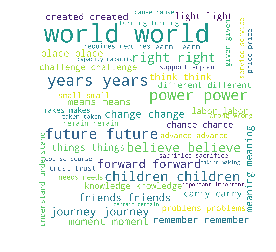

In [89]:
draw_wordcloud(lda,15)

In [79]:
print(lda.show_topic(12,topn=5))
print(lda.show_topic(18,topn=5))

[('protection', 0.048713334), ('power', 0.028730301), ('means', 0.028194424), ('right', 0.02778061), ('opinion', 0.027463747)]
[('world', 0.054191414), ('power', 0.033326074), ('future', 0.026917486), ('children', 0.024975007), ('office', 0.024153478)]


<h1>Similarity</h1>
<h2>Given a corpus of documents, when a new document arrives, find the document that is the most similar</h2>

In [131]:
doc_list = [community_data,le_monde_data,amigos_data,heights_data]
all_text = community_data.raw() + le_monde_data.raw() + amigos_data.raw() + heights_data.raw()

documents = [doc.raw() for doc in doc_list]
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [132]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
Many, many years ago, I used to frequent this place for their amazing french toast. 
It's been a while since then and I've been hesitant to review a place I haven't been to in 7-8 years... 
but I passed by French Roast and, feeling nostalgic, decided to go back.

It was a great decision.

Their Bloody Mary is fantastic and includes bacon (which was perfectly cooked!!), olives, 
cucumber, and celery. The Irish coffee is also excellent, even without the cream which is what I ordered.

Great food, great drinks, a great ambiance that is casual yet familiar like a tiny little French cafe. 
I highly recommend coming here, and will be back whenever I'm in the area next.

Juan, the bartender, is great!! One of the best in any brunch spot in the city, by far.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

In [138]:
index[vec_lsi]

array([0.67548543, 0.93145514, 0.9868139 , 0.9921291 ], dtype=float32)

In [133]:
sims

[(1, 0.9876573), (0, 0.95548683), (3, 0.7929068), (2, 0.7698077)]

In [134]:
doc="""
I went to Mexican Festival Restaurant for Cinco De Mayo because I had been there years 
prior and had such a good experience. This time wasn't so good. The food was just 
mediocre and it wasn't hot when it was brought to our table. They brought my friends food out 
10 minutes before everyone else and it took forever to get drinks. We let it slide because the place was 
packed with people and it was Cinco De Mayo. Also, the margaritas we had were slamming! Pure tequila. 

But then things took a turn for the worst. As I went to get something out of my purse which was on 
the back of my chair, I looked down and saw a huge water bug. I had to warn the lady next to me because 
it was so close to her chair. We called the waitress over and someone came with a broom and a dustpan and 
swept it away like it was an everyday experience. No one seemed phased.

Even though our waitress was very nice, I do not think we will be returning to Mexican Festival again. 
It seems the restaurant is a shadow of its former self.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
sims

[(3, 0.9921291), (2, 0.9868139), (1, 0.93145514), (0, 0.67548543)]